# Configuration

In [19]:
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

## The normal ecuation

In [1]:
import numpy as np

np.random.seed(42)

m = 100 # the number of instances
X = 2 * np.random.rand(m , 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector


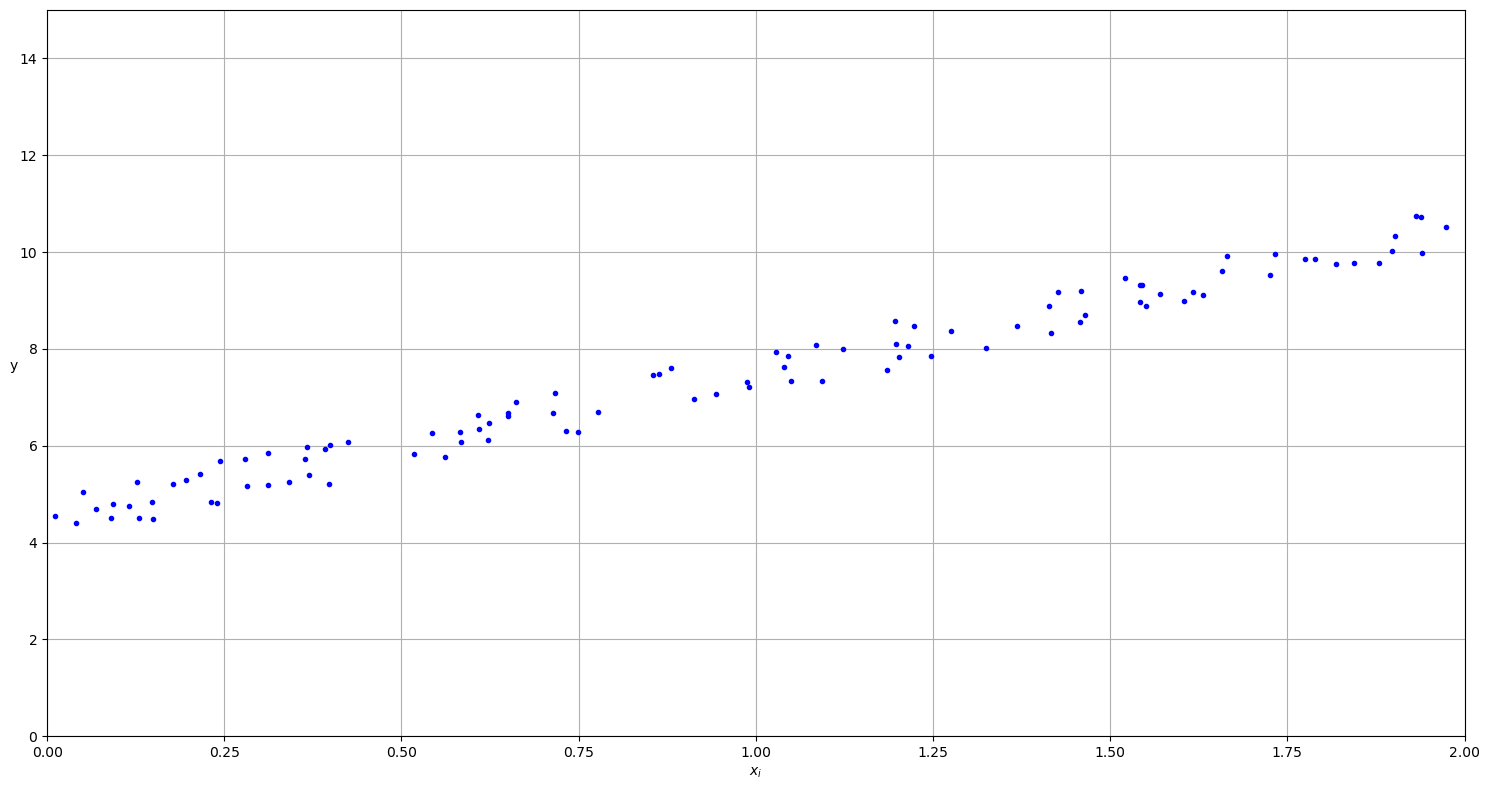

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(X, y, "b.")
plt.ylabel("y", rotation = 0)
plt.xlabel("$x_i$")
plt.axis([0, 2., 0, 15])
plt.grid()
save_fig("generated_data")
plt.show()